<a href="https://colab.research.google.com/github/pranitamahajan27/findFH_aphrodite/blob/master/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  ### Plotting the data on World Map

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = 'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv'

In [3]:
df = pd.read_csv(path)
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28248 entries, 0 to 28247
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  8560 non-null   object        
 1   Country/Region  28248 non-null  object        
 2   Lat             28248 non-null  float64       
 3   Long            28248 non-null  float64       
 4   Date            28248 non-null  datetime64[ns]
 5   Confirmed       28248 non-null  int64         
 6   Deaths          28248 non-null  int64         
 7   Recovered       28248 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [4]:
df.drop(['Province/State'],axis=1,inplace=True)
df.rename(columns={"Country/Region":"Country"},inplace=True)
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [5]:
active =  df['Confirmed'] - df['Recovered'] - df['Deaths']
df['Active'] = active
df.tail()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
28243,Western Sahara,24.215500,-12.885800,2020-05-07,6,0,5,1
28244,Sao Tome and Principe,0.186360,6.613081,2020-05-07,187,4,4,179
28245,Yemen,15.552727,48.516388,2020-05-07,25,5,1,19
28246,Comoros,-11.645500,43.333300,2020-05-07,8,1,0,7
28247,Tajikistan,38.861034,71.276093,2020-05-07,461,12,0,449


##Time Series Analysis
##When data is not constant use time series
###When output is no linear..not following any function
##fbprophet library - facebook library 
##Name of the column should be ds (date stamp) & y (output) ..these are predefined keywords


In [0]:
from fbprophet import Prophet

In [7]:
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [8]:
##Forecast for confirmed cases
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [0]:
##REname column names as per requirement of library
confirmed.rename(columns = {"Date":"ds","Confirmed":"y"},inplace = True)


In [10]:
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [0]:
###Building model
model = Prophet(interval_width = 0.95)

In [12]:
###train model
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
##future forecasting 
future_dates = model.make_future_dataframe(periods=7)
future_dates.tail(10)

,ds
104,2020-05-05
105,2020-05-06
106,2020-05-07
107,2020-05-08
108,2020-05-09
109,2020-05-10
110,2020-05-11
111,2020-05-12
112,2020-05-13
113,2020-05-14


In [14]:
forecast = model.predict(future_dates)
forecast.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
107,2020-05-08,3.907886e+06,3.901091e+06,3.920114e+06,3.905426e+06,3.910513e+06,2572.321704,2572.321704,2572.321704,2572.321704,2572.321704,2572.321704,0.0,0.0,0.0,3.910458e+06
108,2020-05-09,3.987801e+06,3.978080e+06,4.002846e+06,3.978228e+06,3.995728e+06,2953.387375,2953.387375,2953.387375,2953.387375,2953.387375,2953.387375,0.0,0.0,0.0,3.990754e+06
109,2020-05-10,4.067716e+06,4.050775e+06,4.089635e+06,4.048387e+06,4.084813e+06,3065.029630,3065.029630,3065.029630,3065.029630,3065.029630,3065.029630,0.0,0.0,0.0,4.070781e+06
110,2020-05-11,4.147631e+06,4.116873e+06,4.175544e+06,4.118277e+06,4.175546e+06,-1471.013359,-1471.013359,-1471.013359,-1471.013359,-1471.013359,-1471.013359,0.0,0.0,0.0,4.146160e+06
111,2020-05-12,4.227546e+06,4.185208e+06,4.263146e+06,4.189971e+06,4.266480e+06,-4201.529131,-4201.529131,-4201.529131,-4201.529131,-4201.529131,-4201.529131,0.0,0.0,0.0,4.223345e+06
112,2020-05-13,4.307461e+06,4.251982e+06,4.354927e+06,4.256630e+06,4.358317e+06,-3694.075037,-3694.075037,-3694.075037,-3694.075037,-3694.075037,-3694.075037,0.0,0.0,0.0,4.303767e+06
113,2020-05-14,4.387376e+06,4.321221e+06,4.451554e+06,4.319313e+06,4.451164e+06,775.878818,775.878818,775.878818,775.878818,775.878818,775.878818,0.0,0.0,0.0,4.388152e+06


In [15]:
###yhat = predicted value
###yhat lower = lower value of prediction
#yhat upper = upper value of prediction
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
107,2020-05-08,3.910458e+06,3.901091e+06,3.920114e+06
108,2020-05-09,3.990754e+06,3.978080e+06,4.002846e+06
109,2020-05-10,4.070781e+06,4.050775e+06,4.089635e+06
110,2020-05-11,4.146160e+06,4.116873e+06,4.175544e+06
111,2020-05-12,4.223345e+06,4.185208e+06,4.263146e+06
112,2020-05-13,4.303767e+06,4.251982e+06,4.354927e+06
113,2020-05-14,4.388152e+06,4.321221e+06,4.451554e+06


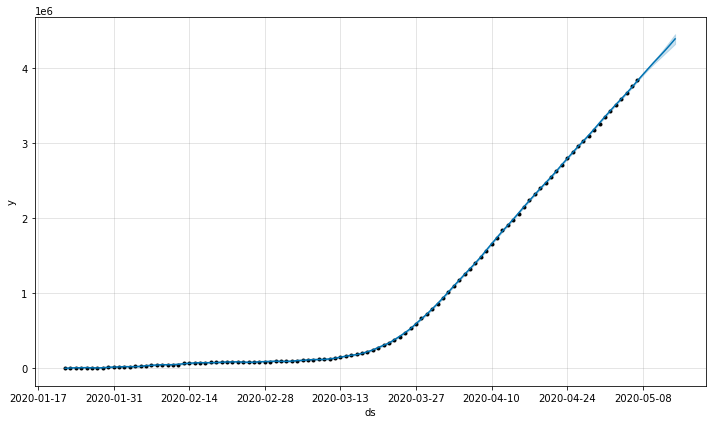

In [16]:
confirmed_plot = model.plot(forecast)

In [26]:
future_dates = model.make_future_dataframe(periods=10)
future_dates.tail(10)

,ds
107,2020-05-08
108,2020-05-09
109,2020-05-10
110,2020-05-11
111,2020-05-12
112,2020-05-13
113,2020-05-14
114,2020-05-15
115,2020-05-16
116,2020-05-17


In [27]:
forecast = model.predict(future_dates)
forecast.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
110,2020-05-11,4.147631e+06,4.119774e+06,4.171812e+06,4.121471e+06,4.171670e+06,-1471.013359,-1471.013359,-1471.013359,-1471.013359,-1471.013359,-1471.013359,0.0,0.0,0.0,4.146160e+06
111,2020-05-12,4.227546e+06,4.183934e+06,4.257511e+06,4.190414e+06,4.259575e+06,-4201.529131,-4201.529131,-4201.529131,-4201.529131,-4201.529131,-4201.529131,0.0,0.0,0.0,4.223345e+06
112,2020-05-13,4.307461e+06,4.252121e+06,4.349543e+06,4.256825e+06,4.351617e+06,-3694.075037,-3694.075037,-3694.075037,-3694.075037,-3694.075037,-3694.075037,0.0,0.0,0.0,4.303767e+06
113,2020-05-14,4.387376e+06,4.321846e+06,4.443677e+06,4.321734e+06,4.441842e+06,775.878818,775.878818,775.878818,775.878818,775.878818,775.878818,0.0,0.0,0.0,4.388152e+06
114,2020-05-15,4.467292e+06,4.390889e+06,4.534894e+06,4.387925e+06,4.534578e+06,2572.321704,2572.321704,2572.321704,2572.321704,2572.321704,2572.321704,0.0,0.0,0.0,4.469864e+06
115,2020-05-16,4.547207e+06,4.457868e+06,4.630808e+06,4.454677e+06,4.625687e+06,2953.387375,2953.387375,2953.387375,2953.387375,2953.387375,2953.387375,0.0,0.0,0.0,4.550160e+06
116,2020-05-17,4.627122e+06,4.523424e+06,4.726787e+06,4.519497e+06,4.723693e+06,3065.029630,3065.029630,3065.029630,3065.029630,3065.029630,3065.029630,0.0,0.0,0.0,4.630187e+06


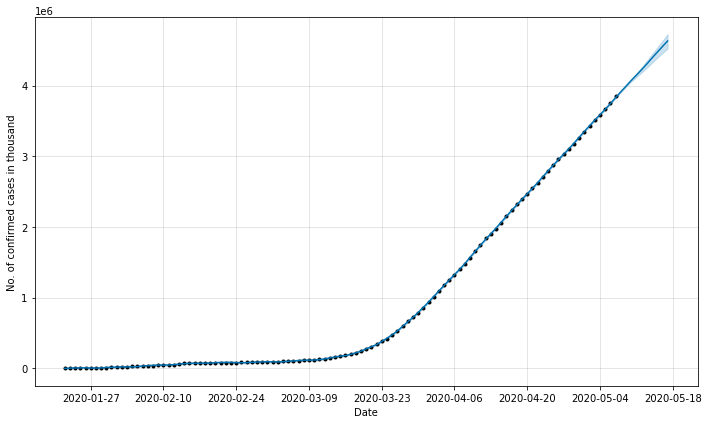

In [31]:
confirmed_plot = model.plot (forecast, ylabel = 'No. of confirmed cases in thousand', xlabel = 'Date')

In [0]:
china = df[df['Country']=='China']

In [21]:
active_china = china.groupby('Date')['Active'].sum().reset_index()
active_china.tail(10)

,Date,Active
97,2020-04-28,881
98,2020-04-29,833
99,2020-04-30,796
100,2020-05-01,749
101,2020-05-02,736
102,2020-05-03,643
103,2020-05-04,537
104,2020-05-05,461
105,2020-05-06,404
106,2020-05-07,361


In [22]:
active_china.rename(columns = {"Date":"ds","Active":"y"},inplace=True)
active_china.tail()

,ds,y
102,2020-05-03,643
103,2020-05-04,537
104,2020-05-05,461
105,2020-05-06,404
106,2020-05-07,361


In [0]:
###Building model
model_china = Prophet(interval_width = 0.95)

In [25]:
###train model###do it for china
model_china.fit(active)

ValueError: ignored